In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from IPython import display
import math

## Running experiments to understand gradient descent

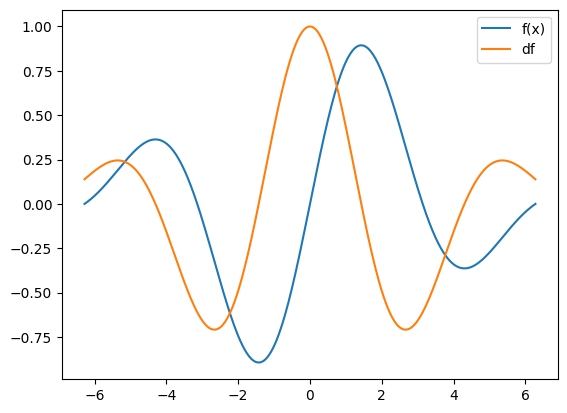

In [2]:
# the function
x = np.linspace(-2 * np.pi, 2 * np.pi, 401)
fx = np.sin(x) * np.exp(-x ** 2 * 0.05)

# and its derivative
df = np.cos(x) * np.exp(-x ** 2 * 0.05) + np.sin(x) * (-0.1 * x) * np.exp(-x ** 2 * 0.05)

# plot for inspection
plt.plot(x, fx, x, df)
plt.legend(['f(x)', 'df'])
plt.show();

In [3]:
def fx(x):
  return np.sin(x) * np.exp(-x ** 2 * 0.05)

def df(x):
  return np.cos(x) * np.exp(-x ** 2 * 0.05) + np.sin(x) * (-0.1 * x) * np.exp(-x ** 2 * 0.05)

In [4]:
localmin = np.random.choice(x, 1)

learning_rate = 0.01
epochs = 200

history = np.zeros((epochs, 2))

for i in range(epochs):
  grad = df(localmin)
  localmin = localmin - grad * learning_rate
  history[i] = localmin[0], grad[0]

localmin

array([-6.20473139])

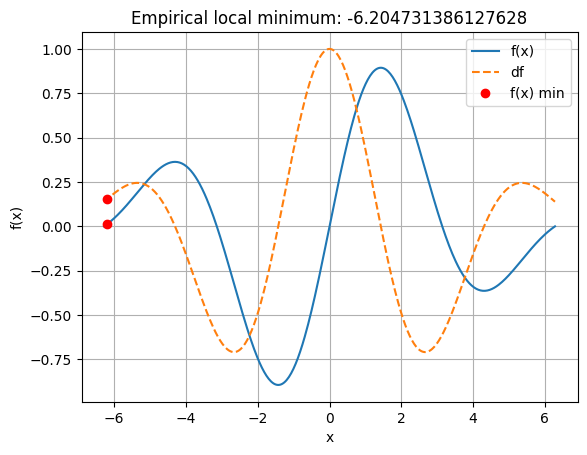

In [5]:
plt.plot(x, fx(x), x, df(x), '--')
plt.plot(localmin, df(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')

# plt.ylim([0, -1])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show();

## Run parametric experiments

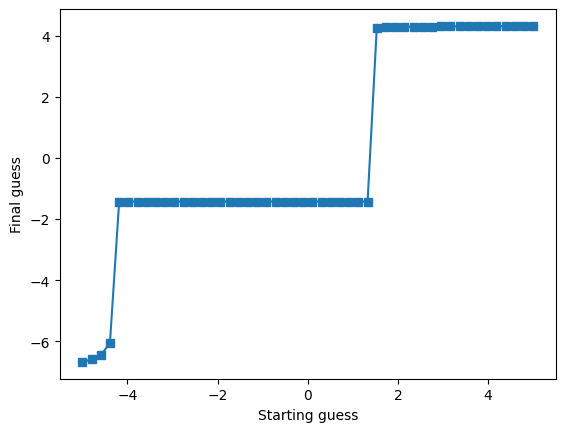

In [6]:
# Experiment 1: systematically varying the starting locations

startlocs = np.linspace(-5, 5, 50)
finalres = np.zeros(len(startlocs))

training_epochs = 1000

# loop over starting points
for idx, localmin in enumerate(startlocs):

  # run through training
  for i in range(training_epochs):
    grad = df(localmin)
    localmin = localmin - learning_rate * grad

  finalres[idx] = localmin

# plot results
plt.plot(startlocs, finalres, 's-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show();

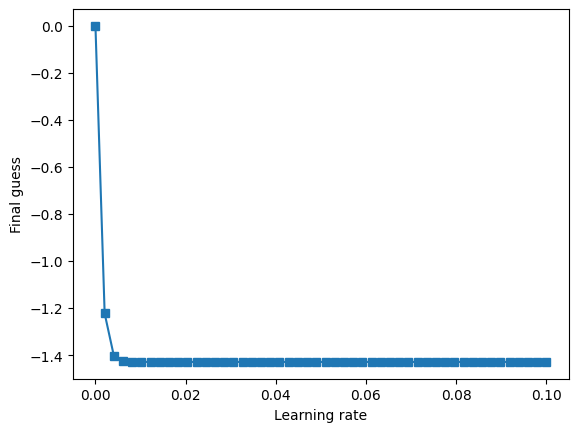

In [7]:
# Experiment 2: systematicallt varying the learning rate

learning_rates = np.linspace(1e-10, 1e-1, 50)
finalres = np.zeros(len(learning_rates))

training_epochs = 1000

for idx, learning_rate in enumerate(learning_rates):

  localmin = 0

  for i in range(training_epochs):
    grad = df(localmin)
    localmin = localmin - learning_rate * grad

  finalres[idx] = localmin

plt.plot(learning_rates, finalres, 's-')
plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.show();

In [8]:
# Experiment 3: interaction between learning rate and training epochs

# setup parameters
learning_rates = np.linspace(1e-10, 1e-1, 50)
training_epochs = np.round(np.linspace(10, 500, 40))

# initialize matrix to store results
finalres = np.zeros((len(learning_rates), len(training_epochs)))

for Lidx, learning_rate in enumerate(learning_rates):
  for Eidx, train_epochs in enumerate(training_epochs):
    localmin = 0

    for i in range(int(train_epochs)):
      grad = df(localmin)
      localmin = localmin - learning_rate * grad

    finalres[Lidx, Eidx] = localmin

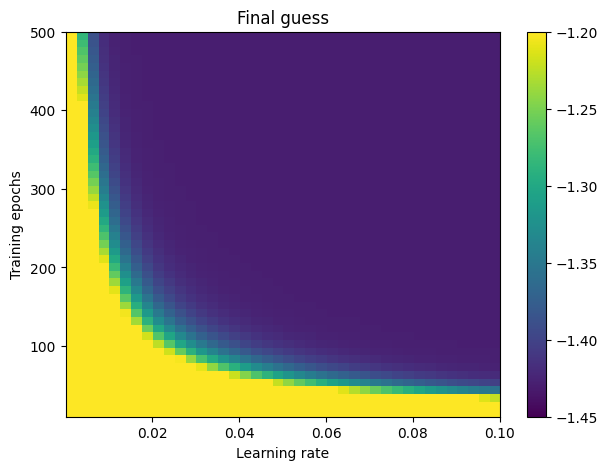

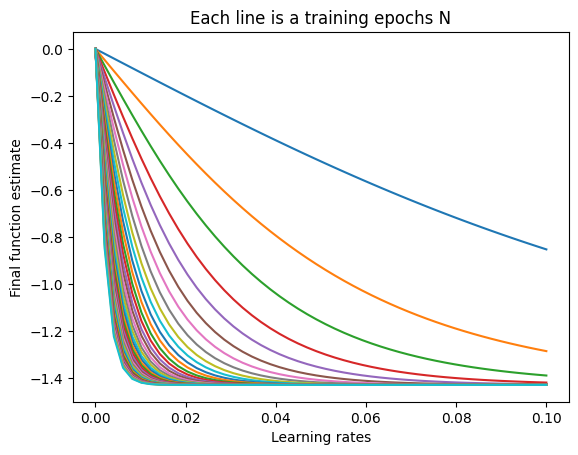

In [9]:
# plot results
fig, ax = plt.subplots(figsize=(7, 5))
plt.imshow(finalres, extent=[learning_rates[0], learning_rates[-1], training_epochs[0], training_epochs[-1]],
           aspect='auto', origin='lower', vmin=-1.45, vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

plt.plot(learning_rates, finalres)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show();

## Dynamic Learning Rate Code Challenge

In [10]:
# function (as a function)
def fx(x):
  return 3 * x ** 2 - 3 * x + 4

# derivative function
def deriv(x):
  return 6 * x - 3

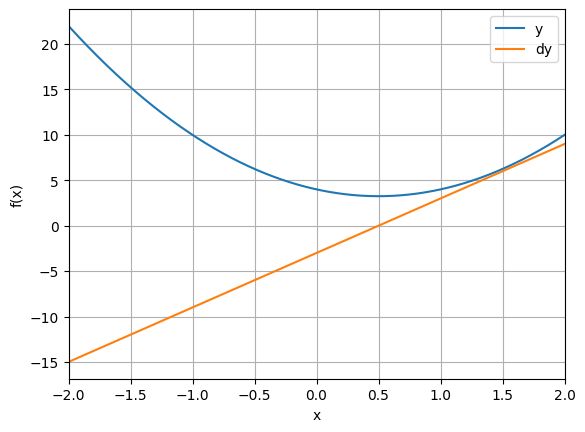

In [11]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2, 2, 2001)

# plotting
plt.plot(x, fx(x), x, deriv(x))
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy'])
plt.show()

In [20]:
# random starting point
localmin = np.random.choice(x, 1)
initval = localmin[:]

# learning parameters
learning_rate = 0.01
training_epochs = 50

# run through training
model_params_fixed = np.zeros((training_epochs, 3), dtype=np.float32)
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate * grad
  model_params_fixed[i, :] = localmin[0], grad[0], learning_rate

localmin

array([0.51604708])

## Gradient descent using a gradient-based learning rate

In [23]:
# random starting point
localmin = np.random.choice(x, 1)
initval = localmin[:]

# learning parameters
learning_rate = 0.1
training_epochs = 50

# run through training
model_params_grad = np.zeros((training_epochs, 3), dtype=np.float32)
for i in range(training_epochs):
  grad = deriv(localmin)

  lr = learning_rate * (1 - (i + 1) / training_epochs)

  localmin = localmin - lr * grad
  model_params_grad[i, :] = localmin[0], grad[0], lr

localmin

array([0.5])

## Gradient descent using a time-based learning rate

In [33]:
# random starting point
localmin = np.random.choice(x, 1)
initval = localmin[:]

# learning parameters
learning_rate = 0.01
training_epochs = 50

# run through training
model_params_time = np.zeros((training_epochs, 3), dtype=np.float32)
for i in range(training_epochs):
  grad = deriv(localmin)

  lr = learning_rate * np.abs(grad)

  localmin = localmin - lr * grad
  model_params_time[i, :] = localmin[0], grad[0], lr[0]

localmin

array([0.46208501])

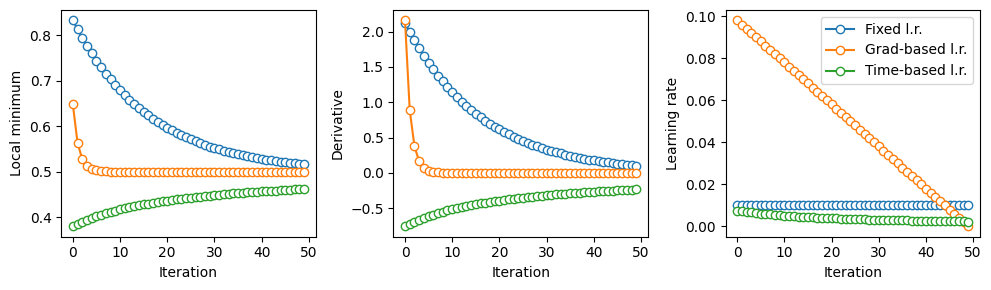

In [36]:
# compare results
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# generate the plots
for i in range(3):
  ax[i].plot(model_params_fixed[:, i], 'o-', markerfacecolor='w')
  ax[i].plot(model_params_grad[:, i], 'o-', markerfacecolor='w')
  ax[i].plot(model_params_time[:, i], 'o-', markerfacecolor='w')
  ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed l.r.', 'Grad-based l.r.', 'Time-based l.r.'])

plt.tight_layout()
plt.plot();

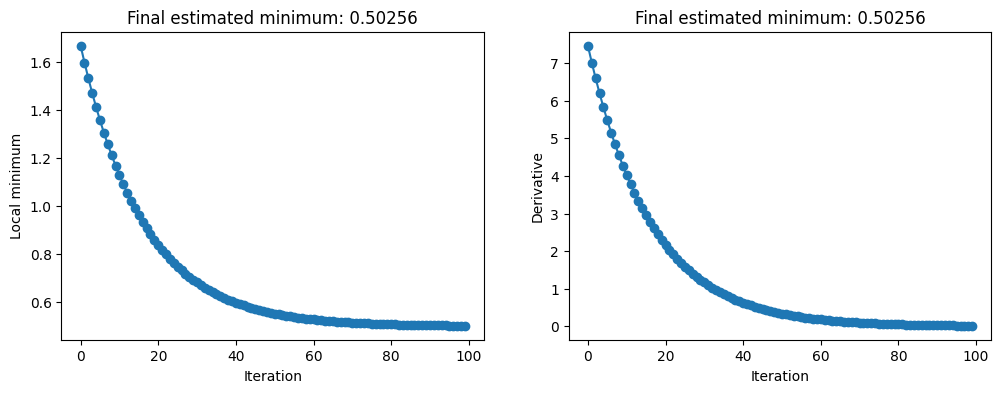

In [ ]:
# plot the gradient over iterations

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
  ax[i].plot(modelparams[:, i], 'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()